# Uso de una API de nuestra elección
Para la práctica 4 de la asignatura Periodismo de datos, se nos pide que escojamos una API de los [datos abiertos del gobierno de España](https://datos.gob.es/es) para
- documentar el proceso de análisis de datos
- crear una visualización
- esbozar una historia con ellos

## Búsqueda de la API
En primer lugar, tenemos que escoger con qué base de datos trabajar. Dentro de la página mencionada, vamos a catálogo de datos y filtramos por JSON para poder trabajar con ello después. Escogemos [Concentración de ozono 2006-2016 en Arganda](https://datosabiertos.ayto-arganda.es/dataset/b7ce7868-f873-402f-951f-ec7e5ce8b854/resource/5c34a69d-b313-4b06-8097-e1dfb81ca3ad/download/convertcsv-108.json)

## Instalación pandas
El siguiente paso es instalar pandas, una biblioteca de software que es la que nos permitirá analizar y manipular los datos. Usamos `!` al inicio, porque Python lee bash. Después importaremos pandas como "pd", que es como lo nombraremos después.

In [58]:
!pip install pandas

In [59]:
import pandas as pd

## Crear variable
Creamos la variable "url" con `=`. Cuando usemos los datos de la url de la concentración de ozono en Arganda solo tendremos que "llamarlo" como "url" en vez de copiarla íntegra. Es importante que al establecer la variable la url vaya entrecomillada para que no haya un error de sintaxis.

In [60]:
url = 'https://datosabiertos.ayto-arganda.es/dataset/b7ce7868-f873-402f-951f-ec7e5ce8b854/resource/5c34a69d-b313-4b06-8097-e1dfb81ca3ad/download/convertcsv-108.json'

## Crear el dataframe
Creamos un dataframe que equivale a los datos de la url, pero para que podamos utilizarlos en Python hemos hecho lo siguiente. Lo primero que vamos a hacer es explicitar que los vamos a usar con pandas ("pd") y dentro de esto vamos a usar la función leer con JSON (JavaScript Objet Notation, el formato, la notación) `read_json`. Dentro de la función incluimos el valor de lo que queremos que se lea, es decir los datos: la url entre `()`. El resultado final es df (el dataframe, la tabla que resultará después) `=` a usar pandas y leer los datos (url) en JSON. Entonces, para referirnos a ello escribimos únicamente "df" y se nos imprime.

In [61]:
df = pd.read_json(url)

In [62]:
df

,Año,Ozono - ug
0,2006,{'m3': 60.75}
1,2007,{'m3': 48.16}
2,2008,{'m3': 45.08}
3,2009,{'m3': 35.66}
4,2010,{'m3': 43.75}
5,2011,{'m3': 56.16}
6,2012,{'m3': 59.75}
7,2013,{'m3': 60.72}
8,2014,{'m3': 56.66}
9,2015,{'m3': 52.83}


## Exploración tabla
Para conocer mejor qué datos poseemos exactamente vamos a utilizar algunas funciones. De entrada, al imprimirse "df" ya vemos que tenemos 2 columnas (la numeración de la izquierda se contabiliza, pero no es un dato verdaderamente) y 11 filas (porque empieza a contabilizar con 0). Para seguir conociendo los datos vamos a aplicar `info()`y `columns` que nos detalla los tipos de datos de nuestro dataframe y qué columnas posee, respectivamente. 

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Año         11 non-null     int64 
 1   Ozono - ug  11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [64]:
df.columns

Index(['Año', 'Ozono - ug'], dtype='object')

Seguimos explorando los datos. Ahora queremos ver solo algunos valores. Para que solo nos muestre valores concretos del dataframe, explicitamos qué queremos que nos muestre escribiéndolo entre `[]`. Entrecomillamos el contenido porque es texto literal, si no, Python no podría interpretarlo). 

In [65]:
df['Año']

0     2006
1     2007
2     2008
3     2009
4     2010
5     2011
6     2012
7     2013
8     2014
9     2015
10    2016
Name: Año, dtype: int64

In [66]:
df['Ozono - ug']

0     {'m3': 60.75}
1     {'m3': 48.16}
2     {'m3': 45.08}
3     {'m3': 35.66}
4     {'m3': 43.75}
5     {'m3': 56.16}
6     {'m3': 59.75}
7     {'m3': 60.72}
8     {'m3': 56.66}
9     {'m3': 52.83}
10     {'m3': 54.5}
Name: Ozono - ug, dtype: object

## Corregir errores
Nos damos cuenta de que esta última columna tiene un "error" o más bien, un problema para ejecutar la visualización que queríamos. Los datos no son valores numéricos porque el dato en sí viene acompañado de "{'m3:}". Como son pocos datos, lo vamos a solucionar modificando cada dato escribiendo solo el valor numérico que corresponde a cada fila. Usamos la función `at` sobre el dataframe. Seguido de ello, dentro de `[]`,escribimos el número de fila (nos guiamos con el índice de la izquierda), y la columna cuyos datos queremos modificar. Después establecemos `=`y el valor que corresponda. Lo hacemos para cada valor.

In [72]:
df.at[0, 'Ozono - ug']=60.75
df.at[1, 'Ozono - ug']=48.16
df.at[2, 'Ozono - ug']=45.08
df.at[3, 'Ozono - ug']=35.66
df.at[4, 'Ozono - ug']=43.08
df.at[5, 'Ozono - ug']=56.16
df.at[6, 'Ozono - ug']=59.75
df.at[7, 'Ozono - ug']=60.72
df.at[8, 'Ozono - ug']=56.66
df.at[9, 'Ozono - ug']=52.83
df.at[10, 'Ozono - ug']=54.50

## Establecer un índice 
Explorando los datos, hemos llegado a la conclusión que lo más interesante para redactar una historia sería, usando el año como índice de la tabla (eje x en un gráfico) se nos mostraran los valores de ozono de cada uno. Para ello, vamos a usar la función `set_index()`colocando como argumento entre `()`qué columna es la que queremos que sea el índice. Lo escribimos entre comillas porque es texto literal.

In [73]:
df.set_index('Año')

,Ozono - ug
Año,
2006,60.75
2007,48.16
2008,45.08
2009,35.66
2010,43.08
2011,56.16
2012,59.75
2013,60.72
2014,56.66


## Visualización
Ya tenemos todo preparado para una visualización. Sobre lo anterior (con la función `set_index`) usamos la función `plot()`. Dentro del argumento, vamos a especificar directamente dos cosas interesantes para nuestro gráfico. Primero, queremos que tenga un título `title='Concentración de ozono en Arganda del Rey'`. Como estamos hablando de concentraciones, creemos también que en vez de un gráfico de líneas (que es el que saldría por defecto) puede ser interesante usar uno de área. Dentro del argumento, separandolo con `, ` de lo anterior, escribimos `kind='area'`.

<AxesSubplot:title={'center':'Concentración de ozono en Arganda del Rey'}, xlabel='Año'>

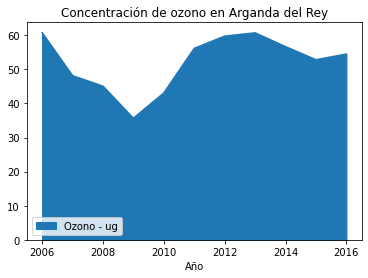

In [74]:
df.set_index('Año').plot(title='Concentración de ozono en Arganda del Rey', kind='area')

## Guardar los datos e imágenes
Ya terminamos de manipular los datos y queremos descargar lo que hemos hecho. Para descargar los datos vamos a convertir el dataframe en csv con la funcón `to_` seguido del formato en que lo convertimos, en este caso `to_csv`. Como argumento de la función, el nombre con el que queremos que se guarde. Es importante no olvidar poner .csv para que se guarde correctamente en el formato escogido. Va entre comillas porque es texto literal.

In [75]:
df.to_csv('practica-4.csv')

Para descargar los gráficos, imágenes, hay que seguir un procedimiento diferente.
Primero importamos `matpltlib.pyplot` que es lo que nos permite ver esos gráficos. Lo importamos `as plt`, que será el nombre que utilicemos, por tanto, para nombrarlo. Es un proceso análogo al que hicimos al principio con pandas (`as pd`).
Después pintamos el gráfico con la función `plot()` como ya hemos explicado. 
Una vez hemos hecho los dos pasos anteriores, usamos `plt` (`matplotlib.pyplot`) con la función `savefig()` que es lo que nos permite guardar esa imagen. Igual que con los datos, el argumento de la función es el nombre con que se guardará la imagen. En este caso ponemos `.png` para que se guarden correctamente en el formato. 

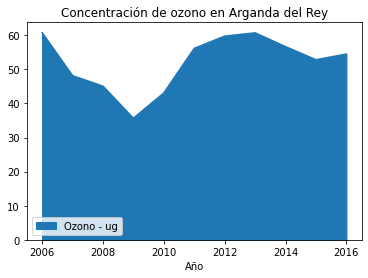

In [76]:
import matplotlib.pyplot as plt
df.set_index('Año').plot(title='Concentración de ozono en Arganda del Rey', kind='area')
plt.savefig('practica-4.png')

Por último, comprobamos que se hayan guardado correctamente con `!ls`

In [77]:
!ls

api-pandas-folium.ipynb  practica-4.csv			  python-pruebas.ipynb
esvsitvsmx.csv		 practica-4.png			  Shared_Resources
esvsitvsmx.png		 python-api-covid19-pandas.ipynb
Notas.ipynb		 python-api-libre-pandas.ipynb


## Esbozo de historia
Como parte de la práctica 4 también se nos pide que esbocemos una historia en la que aplicar los datos con los que hemos trabajado (y su visualización). Como son de Arganda del Rey, tendría sentido que fuese información local. Si vemos el gráfico observamos que tras una fuerte caída de los niveles de ozono en los años 2008-2009, los valores volvieron a subir casi a niveles de 2006. 
El ozono a altas concentraciones en las capas bajas de la atmósfera terrestre es contaminante y perjudicial para la salud humana (sobre todo con enfermedades relacionadas con las vías respiratorias) y la vida vegetal (con la repercusión que esto tiene en la actividad agraria). La información iría orientada a informar sobre este peligro y alertar de que hemos controlar y bajar lo máximo posible estos niveles de ozono (sobre todo teniendo un cuenta la tendencia positiva, si bien es cierto que a partir de 2013 bajó un poco).
No obstante, habría que mencionar que los niveles son preocupantes a partir de 120, dato que Arganda no alcanza. Aún así, hemos de tener en cuenta también que el dato que poseemos es de la media anual y que dentro de él habrá valores más altos y más bajos, pudiendo los primeros sí llegar a valores de alerta. Los niveles de ozono aumentan con la llegada del buen tiempo (precisamente el momento en que nos encontramos, de ahí la pertinencia de la noticia) con el aumento de las temperaturas y la radiación solar. 
Recomendaríamos entonces que durante este periodo se consulte la concentración de ozono diariamente a través de [este enlace](http://gestiona.madrid.org/azul_internet/html/web/DatosEstacion24Accion.icm?ESTADO_MENU=2_1). También informamos de qué hacer las personas de riesgo cuando los niveles sean muy altos (evitar el exterior y sobre todo ejercicios físicos prolongados al aire libre, rehuir el contacto con alérgenos...) y cómo prevenir/reducir los niveles de ozono con acciones individuales (preferencia del transporte público al privado, ahorro energético en los hogares...).